<h><b>Churn Prediction Model Using Decision Trees and Logistical Regression</b></h>
<p><b>Objective: </b> Identify customers who are likely to leave the bank.</p>

In [20]:
# Step 0: Loading all important libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split                                     #function for the training the data
from sklearn.preprocessing import Normalizer                                             #normalizes data for model preparation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report        #tests accuracy of the model
from sklearn.linear_model import LogisticRegression                                      #The library from where logistic regression will be imported
from sklearn.preprocessing import StandardScaler                                         #library to scale our data in order to minimize biasness and confusion for the model
from sklearn.tree import DecisionTreeClassifier                                          #library for DecisionTree
from imblearn.over_sampling import SMOTE                                                 #Using SMOTE to balance our dataset if needed 

In [2]:
# Step 1:  Loading Dataset and Preparing Data Cleaning and Preprocessing 
# -------------------------------
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
# Dropping columns which do not have a significant role in model preparation
# -------------------------------
df.drop(columns=["RowNumber","CustomerId","Surname"])



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
# identifying any null values
# -------------------------------
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<p><b>Performing Exploratory Data Analsysis</b></p>

Text(0, 0.5, 'Count')

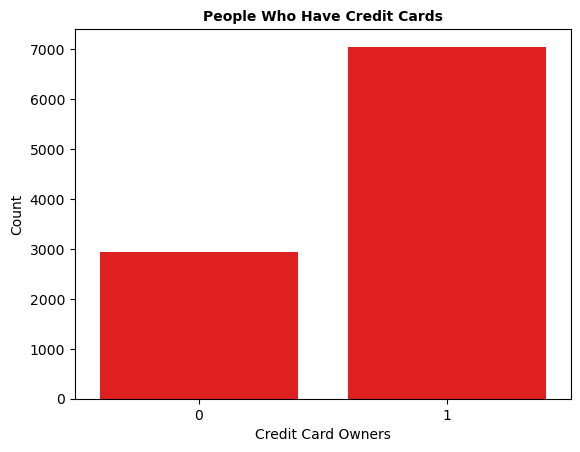

In [7]:
# Using countplot to verify and check if our dataset is balanced or not. Allows confirmation if model will be biased or unbiased
# --------------------------------------

# Countplot A: Credit Card Owners
# ------------------------------------
sns.countplot(x="HasCrCard",data=df,color="Red")
plt.title("People Who Have Credit Cards",fontsize=10,weight="bold")
plt.xlabel("Credit Card Owners")
plt.ylabel("Count")


<b>Countplot shows More People have Credit Cards than those who dont have one</b>
<p>This can cause our model to become biased hence dataset needs to be balanced</p>

Text(0, 0.5, 'Count')

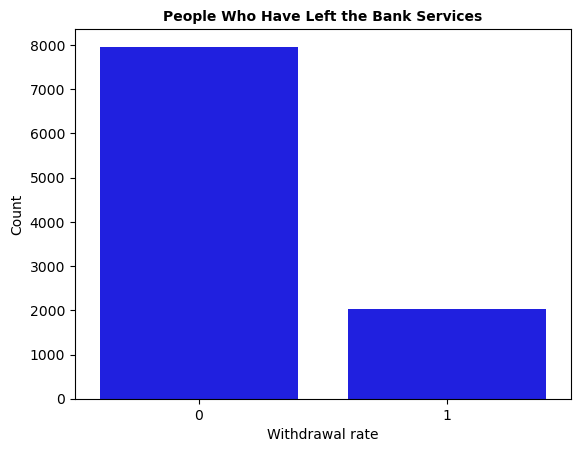

In [8]:
# Countplot B: Withdrawal from Bank
#------------------------------------------------
sns.countplot(x="Exited",data=df,color="Blue")
plt.title("People Who Have Left the Bank Services",fontsize=10,weight="bold")
plt.xlabel("Withdrawal rate")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

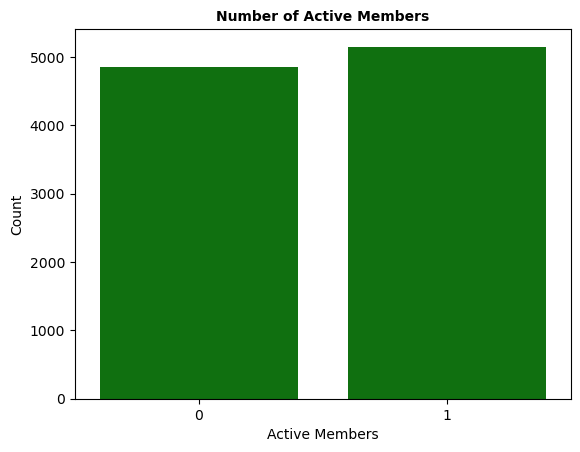

In [9]:
# Countplot C: Number of Active members
#------------------------------------------------
sns.countplot(x="IsActiveMember",data=df,color="Green")
plt.title("Number of Active Members",fontsize=10,weight="bold")
plt.xlabel("Active Members")
plt.ylabel("Count")

Text(0.5, 1.0, 'Churn by Country')

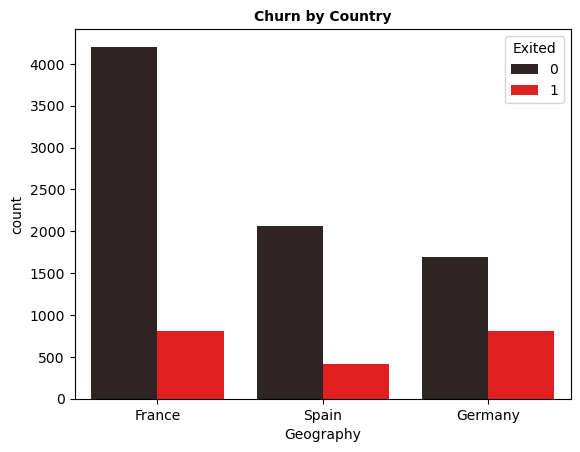

In [10]:
# Countplot D: Withdrawal from Bank Based on Nationality
#------------------------------------------------
sns.countplot(x="Geography", hue="Exited", data=df,palette="dark:red")
plt.title("Churn by Country",fontsize=10,weight="bold")


<h><b>Conclusion of EDA:</b></h>
<li>Countplot A: 7000 people have credit cards whereas 3000 do not hold a credit card</li>
<li>Countplot B: 2000 have left the bank whereas 8000 are still registered with the bank</li>
<li>Countplot C: 5000 people are active members whereas 4500 - 4700 are inactive</li>
<li>Countplot D: Germans and French have tend to leave the bank more than Spain. But France has more clients registered rather than the Germans</li>
<p>Insights: Overall customer dataset shows that there are more French registered with the bank and have more credit card holders. The German Market should be focused on in order to gain more customers to register with the bank.</p>

<b><h>Performing Encoding and Over Sampling using SMOTE </b></h>

In [36]:
# Checking data type
# ----------------------
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
# Encoding the Dataset for Model to Understand it 
# ---------------------------------------------------
df_encoded = pd.get_dummies(data=df,drop_first=True)
df_encoded.head(10)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,False,False,False,False,False,False,False,False,False,False
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,False,False,False,False,False,False,False,False,True,False
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,False,False,False,False,False,False,False,False,False,False
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,False,False,False,False,False,False,False,False,False,False
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,False,False,False,False,False,False,False,False,True,False
5,6,15574012,645,44,8,113755.78,2,1,0,149756.71,...,False,False,False,False,False,False,False,False,True,True
6,7,15592531,822,50,7,0.00,2,1,1,10062.80,...,False,False,False,False,False,False,False,False,False,True
7,8,15656148,376,29,4,115046.74,4,1,0,119346.88,...,False,False,False,False,False,False,False,True,False,False
8,9,15792365,501,44,4,142051.07,2,0,1,74940.50,...,False,False,False,False,False,False,False,False,False,True
9,10,15592389,684,27,2,134603.88,1,1,1,71725.73,...,False,False,False,False,False,False,False,False,False,True


In [13]:
df_encoded.dtypes


RowNumber            int64
CustomerId           int64
CreditScore          int64
Age                  int64
Tenure               int64
                     ...  
Surname_Zuyev         bool
Surname_Zuyeva        bool
Geography_Germany     bool
Geography_Spain       bool
Gender_Male           bool
Length: 2945, dtype: object

In [18]:
b_type = df_encoded.select_dtypes(include="bool").columns
df_encoded[b_type] = df_encoded[b_type].astype(int)

In [19]:
df_encoded.dtypes

RowNumber            int64
CustomerId           int64
CreditScore          int64
Age                  int64
Tenure               int64
                     ...  
Surname_Zuyev        int32
Surname_Zuyeva       int32
Geography_Germany    int32
Geography_Spain      int32
Gender_Male          int32
Length: 2945, dtype: object

<b><h>Running Logistical Regression Model</b></h>

In [38]:
# Model preparation 
# Setting up Features and Target
# ------------------------------------
X = df_encoded.drop(columns="Exited")
Y = df_encoded["Exited"]

# Splitting data for training and testing and stratify keeps class ratio balanced
#----------------------------------------
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42,stratify=Y)

# Scaling The X and Y features for better model preparation
#----------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# using SMOTE on training data for balancing the dataset which showed imbalance in countplot.This will allow the model to decide without being biased
#----------------------------------------
smote = SMOTE(random_state=42)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train_scaled, Y_train)

# running the bodel prepared 
#----------------------------------------
model = LogisticRegression(random_state=42)
model.fit(X_train_balanced, Y_train_balanced)

Y_pred = model.predict(X_test_scaled)

# Evaluating the model
#----------------------------------------
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy:", acc)

# Using classfication report to check recall. Recall will allow us to know how much churns is our model predicting correctly
#----------------------------------------
print("Classification Report: ")
print(classification_report(Y_test, Y_pred))


Accuracy: 0.7595
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.89      0.85      1593
           1       0.37      0.27      0.31       407

    accuracy                           0.76      2000
   macro avg       0.60      0.58      0.58      2000
weighted avg       0.73      0.76      0.74      2000



<b>Insights From Logistical Regression</b>
<p>The result shows that the model is 76% accruate in predicting the churn rate with recall rate for class 0 as 0.89.Older customers were more likely to churn, higher balances showed a correlation with churn, and shorter tenure indicated higher risk of leaving.Age, Balance, and Tenure were strong predictors of customer churn. Model performed well after applying SMOTE to handle class imbalance.</p>

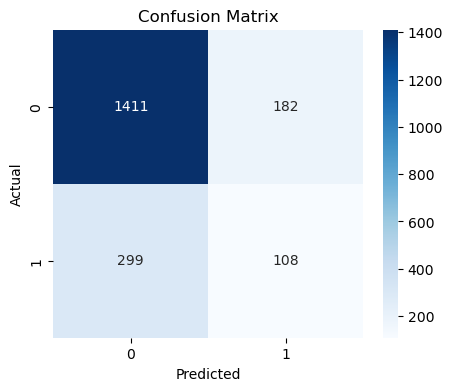

In [26]:
# Plotting The Confusion Matrix For Better Understanding
# -------------------------------------------------------
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<b>Applying Decision Tree for Feature Importance</b>

Accuracy: 0.7585
Confusion Matrix:
[[1263  330]
 [ 153  254]]
Classification Report:
              precision    recall  f1-score   support

           0     0.8919    0.7928    0.8395      1593
           1     0.4349    0.6241    0.5126       407

    accuracy                         0.7585      2000
   macro avg     0.6634    0.7085    0.6760      2000
weighted avg     0.7989    0.7585    0.7730      2000

Top 5 Feature Importances:
Age               0.214907
IsActiveMember    0.112895
NumOfProducts     0.098308
Balance           0.070430
CustomerId        0.066888
dtype: float64


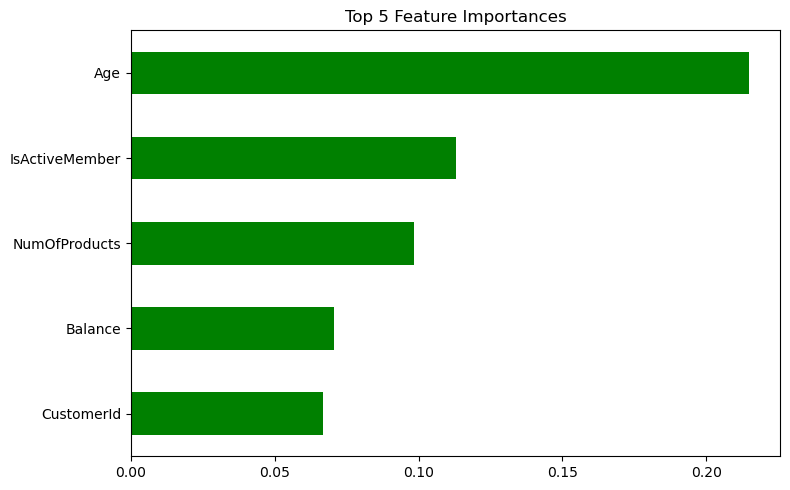

In [41]:
# Preparing model again
X = df_encoded.drop(columns="Exited")
Y = df_encoded["Exited"]

# Train and Test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Balance training set with SMOTE
# ---------------------------
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_train, Y_train)

# Training Decision Tree Model
# ---------------------------
dt = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
dt.fit(X_bal, y_bal)

# Predicting the model
# ---------------------------
y_pred = dt.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)

# Printing results 
# -----------------------------
print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Displaying Feature Importance
# ---------------------------
importances = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Top 5 Feature Importances:")
print(importances.head(5))

# Plotting the Features
# ----------------------------
plt.figure(figsize=(8,5))
importances.head(5).plot(kind="barh", color="green")
plt.title("Top 5 Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



<b>Insights from the Decision Tree Model</b>
Decision Tree was used in order to get better results on non linear relationships and interaction among the features
<p>The Result shows that: </p>
<li>Age was the biggest decisive factor in deciding the churn factor</li>
<li>The persons activity with the bank also played a role in deciding if they will churn or not in the future</li>

<h><b>FINAL CONCLUSION</b></h>
<li>Both models performed comparably with 75% accuracy.</li>

<li>Logistic Regression is more stable and interpretable for deployment.</li>

<li>Decision Tree provides better visibility into feature splits but may require techniques to improve performance.</li>
